In [5]:
from sympy import *
init_printing()
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Fluctuating transmission, constant selection

In [13]:
x, w, ρ, r, s = symbols('x w ρ r s')

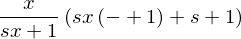

In [17]:
y = x * (x * s * (1 - ρ) + 1 + ρ * s) / (1 + x * s)
y

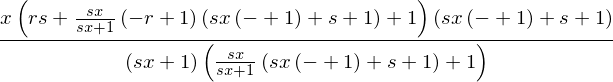

In [18]:
z = y * (y * s * (1 - r) + 1 + r * s) / (1 + y * s)
z

## Solve x''=x

In [19]:
simplify((z-x).subs(x, 0)), simplify((z-x).subs(x, 1))

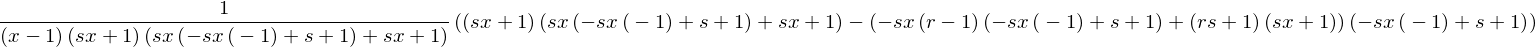

In [47]:
G = (z - x) / (x * (1 - x))
simplify(G)

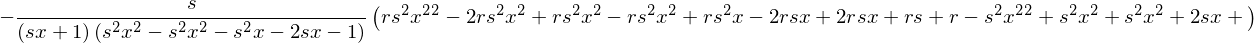

In [48]:
factor(G)

In [49]:
G = simplify(G * (1 + x * s) * (1 + x * s * (2 + s * ρ) + x**2 * s **2 * (1 - ρ)) / s)
G

In [15]:
a, b, c = Poly(G, x).all_coeffs()

In [16]:
simplify(a)

In [17]:
simplify(b)

In [18]:
simplify(c)

In [51]:
x1, x2 = simplify(solve(G, x))
simplify(G.subs({x:x1})), simplify(G.subs({x:x2}))

Text(0,0.5,'fixed point')

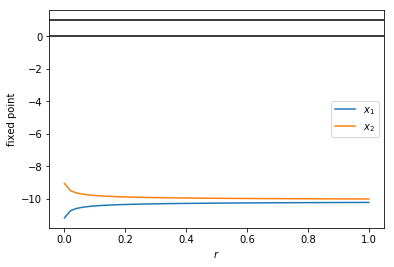

In [74]:
ρ_ = 0.01
s_ = 0.1
r_ = np.linspace(0, 1)
plt.plot(
    r_,
    [x1.subs({s:s_, r:r__, ρ:ρ_}) for r__ in r_],
    label=r'$x_1$'
)
plt.plot(
    r_,
    [x2.subs({s:s_, r:r__, ρ:ρ_}) for r__ in r_],
    label=r'$x_2$'
)
plt.axhline(0, color='k')
plt.axhline(1, color='k')
plt.legend()
plt.xlabel('$r$')
plt.ylabel('fixed point')

In [77]:
def recursion(x, s, ρ, r):
    wbar = 1 + s * x
    x = ρ * (1 + s) * x / wbar + (1-ρ) * x
    wbar = 1 + s * x
    x = r * (1 + s) * x / wbar + (1 - r) * x
    return x

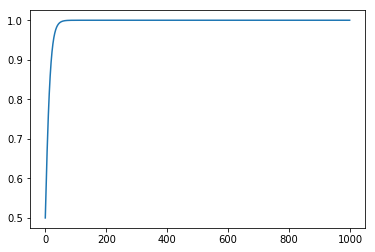

In [86]:
ρ = 0.1
r = 0.2
s = 0.5

x0 = 0.5
n = 1000

x = np.empty(n)
x[0] = x0

for t in range(1, n):
    x[t] = recursion(x[t-1], s, ρ, r)
    
plt.plot(x);

## Diff x''

In [11]:
simplify(diff(z, x).subs({x: 0}))

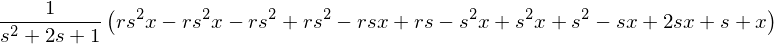

In [16]:
simplify(diff(z, x).subs({x: 1})*(x-1) + 1, 100)

# Fluctuating transmission and selection

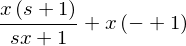

In [66]:
y = ρ * (1+s)/(1+s*x) * x + (1-ρ)*x
y

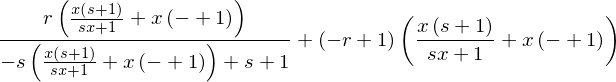

In [67]:
z = r * 1/(1+s-s*y) * y + (1-r)*y
z

## Solve x''=x

In [68]:
simplify((z-x).subs(x, 0)), simplify((z-x).subs(x, 1))

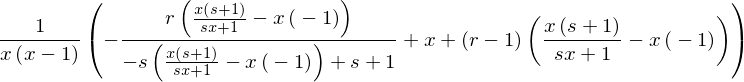

In [69]:
G = (z - x) / (x * (1 - x))
simplify(G)

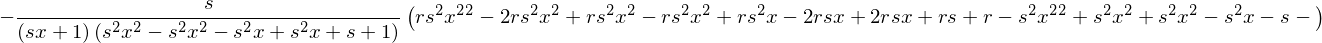

In [70]:
factor(G)

In [71]:
G = simplify(G * -(1+s*x)*(s**2 * x**2 * ρ - s**2 * x**2 - s**2 * x * ρ + s**2 * x + s + 1)/s)
G

In [72]:
a, b, c = Poly(G, x).all_coeffs()

In [88]:
simplify(a)

In [79]:
simplify(b)

In [81]:
simplify(c)

In [39]:
x1, x2 = simplify(solve(G, x))
simplify(G.subs({x:x1})), simplify(G.subs({x:x2}))

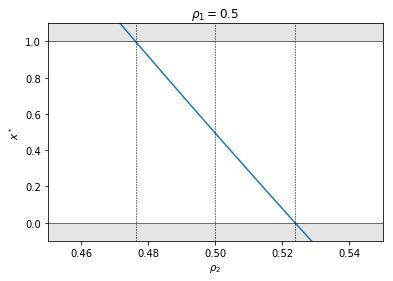

In [106]:
ρ_ = 0.5
s_ = 0.1
r_ = np.linspace(ρ_*0.9, ρ_*1.1)
plt.plot(
    r_,
    [x2.subs({s:s_, r:r__, ρ:ρ_}) for r__ in r_],
    label=r'$x_2$'
)
plt.plot(
    r_,
    [x1.subs({s:s_, r:r__, ρ:ρ_}) for r__ in r_],
    label=r'$x_1$'
)

axline_kws = dict(color='k', lw=0.5)
plt.axhline(0, **axline_kws)
plt.axhline(1, **axline_kws)
plt.axvline(ρ_, **axline_kws, ls='--')
plt.axvline(ρ_*(1+s_)/(1+ρ_*s_), **axline_kws, ls='--')
plt.axvline(ρ_/(1+s_*(1-ρ_)), **axline_kws, ls='--')
plt.fill_between([0,1], 1, 1.1, color='k', alpha=0.1)
plt.fill_between([0,1], -0.1, 0, color='k', alpha=0.1)
# plt.legend()
plt.xlabel(r'$\rho_2$')
plt.ylabel('$x^*$')
plt.title(r'$\rho_1=$' + '{}'.format(ρ_))
plt.ylim(-0.1, 1.1)
plt.xlim(r_.min(), r_.max())
plt.savefig('figures/rho1_rho2_k=1.pdf')

In [86]:
simplify(2*a+b-s*(1-ρ)*(2*r*(1+s) +s*ρ*(1-r)))

In [96]:
ρ_*(1+s_)/(1+ρ_*s_)